<a href="https://colab.research.google.com/github/Jessesantoz/DadosEnem2022/blob/main/Enem_Etnia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento dos dados Enem:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dadosEnem = pd.read_csv("/content/drive/MyDrive/Dados/microdados_enem_2022/DADOS/MICRODADOS_ENEM_2022.csv", sep=";", encoding = "ISO-8859-1")

In [3]:
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [4]:
dadosEnem.shape

(3476105, 76)

In [5]:
dadosEnem.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

# Organização dos dados por indicadores de cor:

In [6]:
dadosEtnia = dadosEnem.filter(items= ['NU_INSCRICAO', 'TP_COR_RACA'])

dadosEtnia

,NU_INSCRICAO,TP_COR_RACA
0,210057943671,2
1,210057516120,1
2,210057280536,2
3,210055724397,3
4,210055097896,3
...,...,...
3476100,210056389903,1
3476101,210057205644,1
3476102,210056699189,1
3476103,210056983033,3


In [7]:
dadosEtnia.columns

Index(['NU_INSCRICAO', 'TP_COR_RACA'], dtype='object')

In [8]:
dicionarioTP_COR_RACA = {
0:'Não declarado',
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indígena',
6:'Não dispõe da informação'
}

In [9]:
dicionarioTP_COR_RACA

{0: 'Não declarado',
 1: 'Branca',
 2: 'Preta',
 3: 'Parda',
 4: 'Amarela',
 5: 'Indígena',
 6: 'Não dispõe da informação'}

In [10]:
dadosEtnia['Etnia'] = [dicionarioTP_COR_RACA[resp] for resp in dadosEtnia.TP_COR_RACA]

In [11]:
dadosEtnia.head()

,NU_INSCRICAO,TP_COR_RACA,Etnia
0,210057943671,2,Preta
1,210057516120,1,Branca
2,210057280536,2,Preta
3,210055724397,3,Parda
4,210055097896,3,Parda


In [12]:
Etnia = dadosEtnia.filter(items= ['NU_INSCRICAO', 'Etnia']).groupby(['Etnia']).count()

Etnia

,NU_INSCRICAO
Etnia,
Amarela,66051
Branca,1428081
Indígena,19840
Não declarado,64867
Parda,1488844
Preta,408422


<Axes: xlabel='Etnia'>

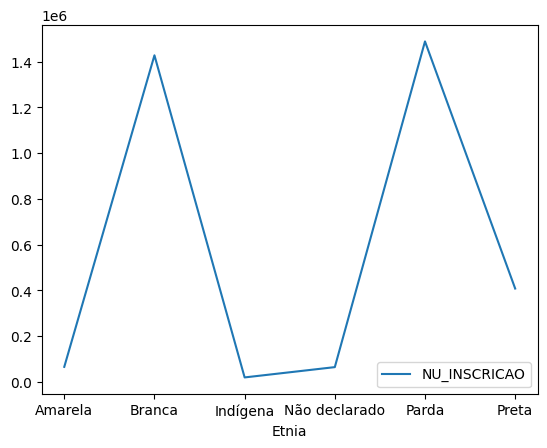

In [13]:
Etnia.plot()

# Análise da relação: tipo de ensino (público ou privado) e cor:

In [14]:
dadosEtnia['TP_ESCOLA'] = dadosEnem.TP_ESCOLA

In [15]:
dadosEtnia.head()

,NU_INSCRICAO,TP_COR_RACA,Etnia,TP_ESCOLA
0,210057943671,2,Preta,1
1,210057516120,1,Branca,1
2,210057280536,2,Preta,1
3,210055724397,3,Parda,1
4,210055097896,3,Parda,1


In [16]:
dicionarioTP_ESCOLA = {
1:'Não Respondeu',
2:'Pública',
3:'Privada'
}


In [17]:
dadosEtnia['Escola'] = [dicionarioTP_ESCOLA[resp] for resp in dadosEtnia.TP_ESCOLA]

In [18]:
dadosEtnia.tail(3)

,NU_INSCRICAO,TP_COR_RACA,Etnia,TP_ESCOLA,Escola
3476102,210056699189,1,Branca,2,Pública
3476103,210056983033,3,Parda,3,Privada
3476104,210056307777,3,Parda,2,Pública


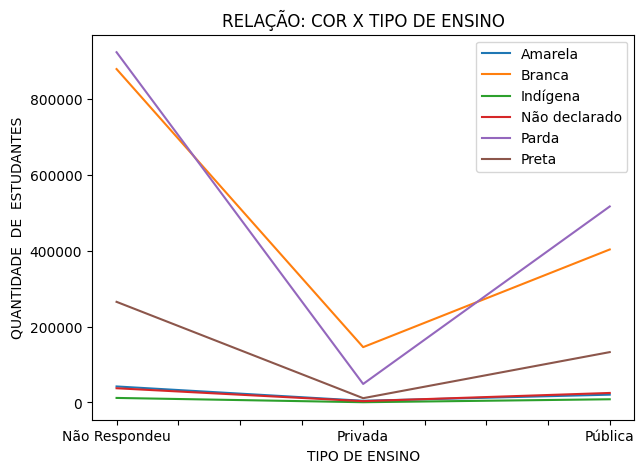

In [103]:
relacaoCorEnsino = dadosEtnia.filter(items=['NU_INSCRICAO', 'Etnia', 'Escola'])\
.groupby(['Escola', 'Etnia']).count().unstack()


ax = relacaoCorEnsino.plot()

legend_labels = relacaoCorEnsino.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (5, 5)
plt.title('RELAÇÃO: COR X TIPO DE ENSINO')
plt.ylabel('QUANTIDADE  DE  ESTUDANTES')
plt.xlabel('TIPO DE ENSINO')
plt.show()

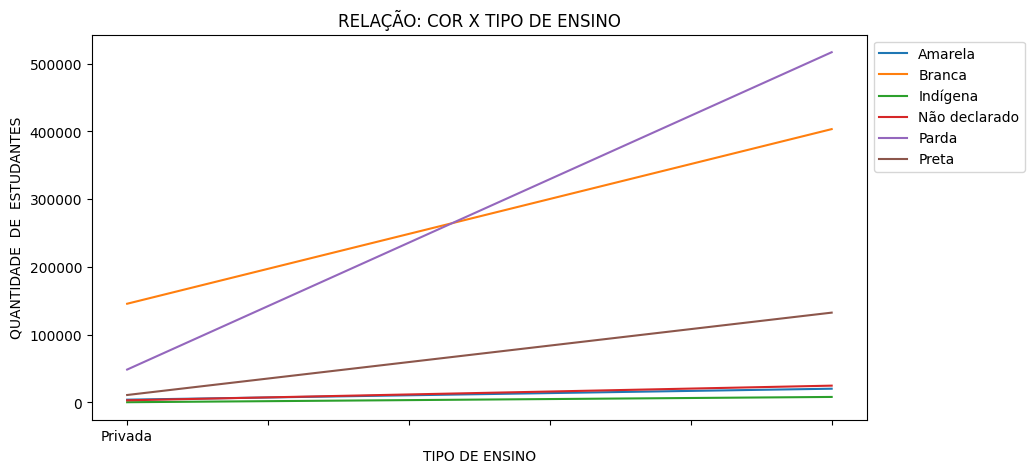

In [107]:
relacaoCorEnsino2 = dadosEtnia.filter(items=['NU_INSCRICAO', 'Etnia', 'Escola']).where(dadosEtnia.Escola != 'Não Respondeu')\
.groupby(['Escola', 'Etnia']).count().unstack()

ax = relacaoCorEnsino2.plot()

legend_labels = relacaoCorEnsino2.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (10, 5)
plt.title('RELAÇÃO: COR X TIPO DE ENSINO')
plt.ylabel('QUANTIDADE  DE  ESTUDANTES')
plt.xlabel('TIPO DE ENSINO')
plt.show()

# Aluno de escola rural ou Urbana:

In [21]:
dadosEtnia['TP_LOCALIZACAO_ESC'] = dadosEnem.TP_LOCALIZACAO_ESC

In [22]:
dadosEtnia.dropna()

,NU_INSCRICAO,TP_COR_RACA,Etnia,TP_ESCOLA,Escola,TP_LOCALIZACAO_ESC
15,210055201589,3,Parda,2,Pública,1.0
40,210056717205,3,Parda,2,Pública,1.0
55,210056012033,1,Branca,2,Pública,1.0
57,210056292241,3,Parda,2,Pública,1.0
59,210054772114,3,Parda,2,Pública,1.0
...,...,...,...,...,...,...
3476098,210055668087,3,Parda,2,Pública,1.0
3476101,210057205644,1,Branca,2,Pública,1.0
3476102,210056699189,1,Branca,2,Pública,1.0
3476103,210056983033,3,Parda,3,Privada,1.0


In [23]:
dadosEtnia.TP_LOCALIZACAO_ESC.tail()

3476100    NaN
3476101    1.0
3476102    1.0
3476103    1.0
3476104    1.0
Name: TP_LOCALIZACAO_ESC, dtype: float64

In [24]:
dicionarioLoc = {
1.0 :'Urbana',
2.0 :'Rural',
np.nan :'Não declarados'
}


In [25]:
dadosEtnia['TP_LOCALIZACAO_ESC'].values

array([nan, nan, nan, ...,  1.,  1.,  1.])

# Distribuição de cor por região:

In [26]:
dadosEtnia['UF'] = dadosEnem.SG_UF_ESC

In [27]:
dadosEtnia.dropna()

,NU_INSCRICAO,TP_COR_RACA,Etnia,TP_ESCOLA,Escola,TP_LOCALIZACAO_ESC,UF
15,210055201589,3,Parda,2,Pública,1.0,SE
40,210056717205,3,Parda,2,Pública,1.0,CE
55,210056012033,1,Branca,2,Pública,1.0,SP
57,210056292241,3,Parda,2,Pública,1.0,GO
59,210054772114,3,Parda,2,Pública,1.0,PA
...,...,...,...,...,...,...,...
3476098,210055668087,3,Parda,2,Pública,1.0,MG
3476101,210057205644,1,Branca,2,Pública,1.0,PE
3476102,210056699189,1,Branca,2,Pública,1.0,SC
3476103,210056983033,3,Parda,3,Privada,1.0,SP


In [28]:
dadosEtnia['UF'].values

array([nan, nan, nan, ..., 'SC', 'SP', 'GO'], dtype=object)

In [29]:
relacaoEtniaEstadoSP = dadosEtnia.filter(items=['UF', 'Etnia']).where(dadosEtnia.UF == 'SP')\
.groupby(['Etnia']).count().sort_values(by='UF', ascending=False)

relacaoEtniaEstadoSP


,UF
Etnia,
Branca,114065
Parda,47889
Preta,15707
Amarela,3884
Não declarado,2195
Indígena,555


In [30]:
relacaoEtniaEstadoMG = dadosEtnia.filter(items=['UF', 'Etnia']).where(dadosEtnia.UF == 'MG')\
.groupby(['Etnia']).count().sort_values(by='UF', ascending=False)

relacaoEtniaEstadoMG


,UF
Etnia,
Branca,34501
Parda,25283
Preta,6891
Não declarado,1073
Amarela,927
Indígena,194


In [31]:
relacaoEtniaEstadoBA = dadosEtnia.filter(items=['UF', 'Etnia']).where(dadosEtnia.UF == 'BA')\
.groupby(['Etnia']).count().sort_values(by='UF', ascending=False)

relacaoEtniaEstadoBA


,UF
Etnia,
Parda,20870
Branca,10690
Preta,10662
Não declarado,1008
Amarela,957
Indígena,296


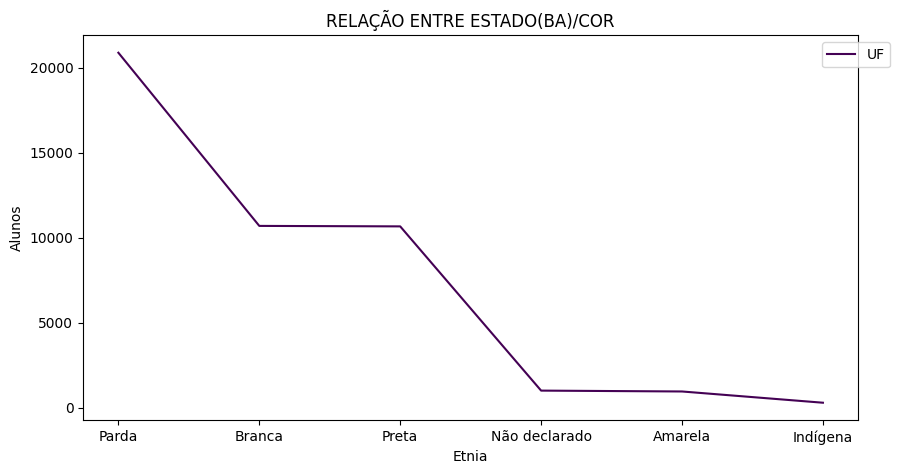

In [108]:
relacaoEtniaEstadoBA.plot(colormap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title ('RELAÇÃO ENTRE ESTADO(BA)/COR')
plt.ylabel('Alunos')
plt.xlabel('Etnia')
plt.show()

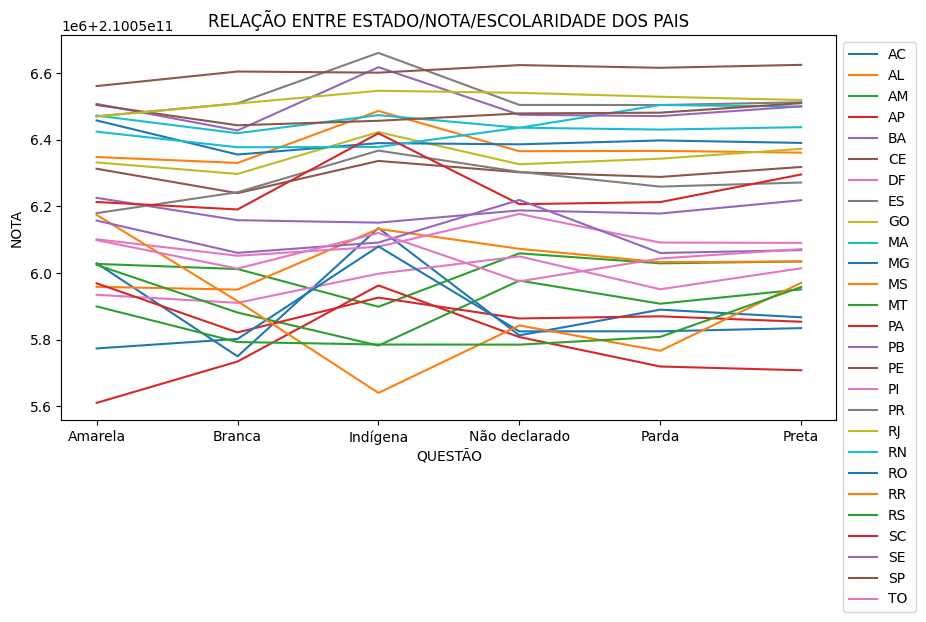

In [115]:
relacaoEtniaEstado = dadosEtnia.filter(items=['UF', 'Etnia', 'NU_INSCRICAO']).where(dadosEtnia.Etnia != 'Não Declarado' ).groupby(['Etnia', 'UF']).mean()\
.unstack()

ax = relacaoEtniaEstado.plot()

legend_labels = relacaoEtniaEstado.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (10, 5)
plt.title ('RELAÇÃO ENTRE ESTADO/NOTA/ESCOLARIDADE DOS PAIS')
plt.ylabel('NOTA')
plt.xlabel('QUESTÃO')
plt.show()


# Grau de Estudo dos pais:

In [34]:
dadosEtnia['Q001'] = dadosEnem.Q001
dadosEtnia['Q002'] = dadosEnem.Q002

In [35]:
q001le002Dicionario = {
"A": "Nunca estudou",
"B":"Não completou a 4ª série/5º ano do Ensino Fundamental",
"C":"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",
"D":"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",
"E":"Completou o Ensino Médio, mas não completou a Faculdade",
"F":"Completou a Faculdade, mas não completou a Pós-graduação",
"G":"Completou a Pós-graduação",
"H":"Não sei"}

In [36]:
dadosEtnia['R_001'] = [q001le002Dicionario[resp] for resp in dadosEnem.Q001]
dadosEtnia['R_002'] = [q001le002Dicionario[resp] for resp in dadosEnem.Q002]

In [37]:
respostas001SP = dadosEtnia.filter(items=['NU_INSCRICAO', 'R_001']).where(dadosEtnia.UF == 'SP').groupby(['R_001']).count()\
.sort_values(by='NU_INSCRICAO', ascending=False)

respostas002SP = dadosEtnia.filter(items=['NU_INSCRICAO', 'R_002']).where(dadosEtnia.UF == 'SP').groupby(['R_002']).count()\
.sort_values(by='NU_INSCRICAO', ascending=False)

In [38]:
respostas001SP


,NU_INSCRICAO
R_001,
"Completou o Ensino Médio, mas não completou a Faculdade",66513
"Completou a Faculdade, mas não completou a Pós-graduação",27772
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",21169
Completou a Pós-graduação,18832
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",17760
Não sei,16850
Não completou a 4ª série/5º ano do Ensino Fundamental,13613
Nunca estudou,1786


In [39]:
respostas002SP

,NU_INSCRICAO
R_002,
"Completou o Ensino Médio, mas não completou a Faculdade",74573
"Completou a Faculdade, mas não completou a Pós-graduação",34305
Completou a Pós-graduação,25960
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",20405
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",13664
Não completou a 4ª série/5º ano do Ensino Fundamental,8742
Não sei,5596
Nunca estudou,1050


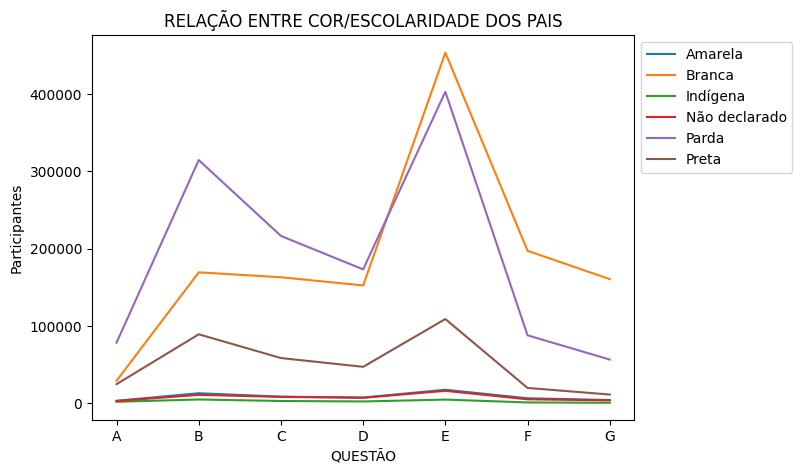

In [126]:
q001Cor = dadosEtnia.filter(items=['Etnia', 'Q001', 'NU_INSCRICAO']).where(dadosEtnia.Q001 != 'H').groupby(['Q001', 'Etnia']).count().unstack()

ax = q001Cor.plot()

legend_labels = q001Cor.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR/ESCOLARIDADE DOS PAIS')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

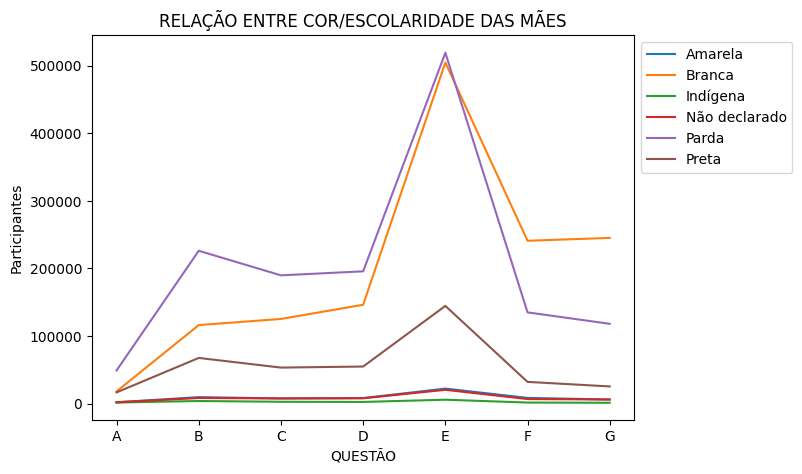

In [125]:
q002Cor = dadosEtnia.filter(items=['Etnia', 'Q002', 'NU_INSCRICAO']).where(dadosEtnia.Q002 != 'H').groupby(['Q002', 'Etnia']).count().unstack()

ax = q002Cor.plot()

legend_labels = q002Cor.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR/ESCOLARIDADE DAS MÃES')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

In [42]:
q001Pretos = dadosEtnia.filter(items=['Etnia', 'Q001', 'NU_INSCRICAO']).where(dadosEtnia.Etnia == 'Preta')\
.groupby(['Q001', 'Etnia']).count()

q001Pretos.sort_values(by='NU_INSCRICAO', ascending=False)

,,NU_INSCRICAO
Q001,Etnia,
E,Preta,108819
B,Preta,89081
C,Preta,58379
H,Preta,49611
D,Preta,47028
A,Preta,24613
F,Preta,19703
G,Preta,11188


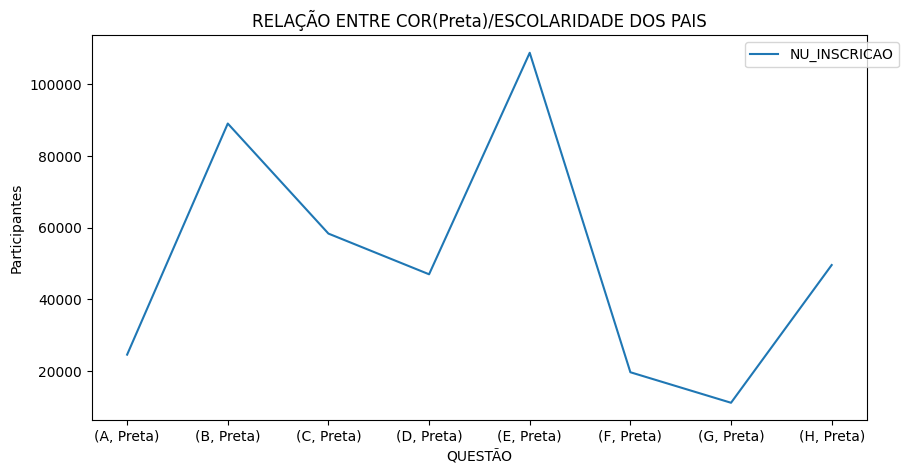

In [128]:
q001Pretos.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title ('RELAÇÃO ENTRE COR(Preta)/ESCOLARIDADE DOS PAIS')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

In [44]:
q001Parda = dadosEtnia.filter(items=['Etnia', 'Q001', 'NU_INSCRICAO']).where(dadosEtnia.Etnia == 'Parda')\
.groupby(['Q001', 'Etnia']).count()

q001Pretos.sort_values(by='NU_INSCRICAO', ascending=False)

,,NU_INSCRICAO
Q001,Etnia,
E,Preta,108819
B,Preta,89081
C,Preta,58379
H,Preta,49611
D,Preta,47028
A,Preta,24613
F,Preta,19703
G,Preta,11188


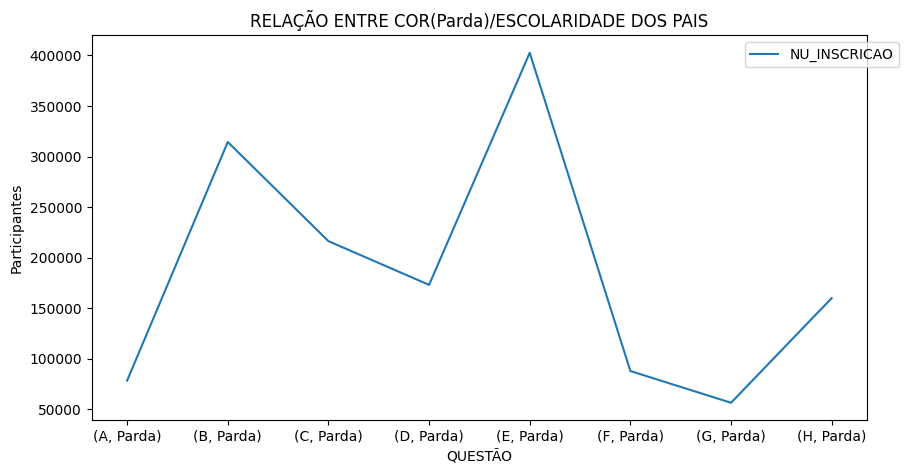

In [45]:
q001Parda.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title ('RELAÇÃO ENTRE COR(Parda)/ESCOLARIDADE DOS PAIS')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

# Trabalho dos pais:

In [59]:
dicionarioQ003 = {
    "A": "Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.",
    "B": "Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.",
    "C": "Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.",
    "D": "Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.",
    "E": "Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.",
    "F": "Não sei."
}

dicionarioQ004 = {
    "A": "Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.",
    "B": "Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.",
    "C": "Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.",
    "D": "Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.",
    "E": "Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.",
    "F": "Não sei."
}



In [60]:
dadosEtnia['Q003'] = dadosEnem.Q003
dadosEtnia['Q004'] = dadosEnem.Q004

In [61]:
dadosEtnia['R_003'] = [dicionarioQ003[resp] for resp in dadosEtnia.Q003]
dadosEtnia['R_004'] = [dicionarioQ004[resp] for resp in dadosEtnia.Q004]

In [65]:
q003 = dadosEtnia.filter(items=['NU_INSCRICAO', 'R_003']).groupby(['R_003']).count()

q003.sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
R_003,
"Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.",803761
"Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.",685602
"Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.",682879
"Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.",629165
Não sei.,419930
"Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.",254768


In [64]:
q004 = dadosEtnia.filter(items=['NU_INSCRICAO', 'R_004']).groupby(['R_004']).count()

q004.sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
R_004,
"Grupo 2: Diarista, empregada doméstica, cuidadora de idosos, babá, cozinheira (em casas particulares), motorista particular, jardineira, faxineira de empresas e prédios, vigilante, porteira, carteira, office-boy, vendedora, caixa, atendente de loja, auxiliar administrativa, recepcionista, servente de pedreiro, repositora de mercadoria.",1418325
"Grupo 4: Professora (de ensino fundamental ou médio, idioma, música, artes etc.), técnica (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretora de imóveis, supervisora, gerente, mestre de obras, pastora, microempresária (proprietária de empresa com menos de 10 empregados), pequena comerciante, pequena proprietária de terras, trabalhadora autônoma ou por conta própria.",841828
"Grupo 1: Lavradora, agricultora sem empregados, bóia fria, criadora de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultora, pescadora, lenhadora, seringueira, extrativista.",505935
Não sei.,303138
"Grupo 3: Padeira, cozinheira industrial ou em restaurantes, sapateira, costureira, joalheira, torneira mecânica, operadora de máquinas, soldadora, operária de fábrica, trabalhadora da mineração, pedreira, pintora, eletricista, encanadora, motorista, caminhoneira, taxista.",219954
"Grupo 5: Médica, engenheira, dentista, psicóloga, economista, advogada, juíza, promotora, defensora, delegada, tenente, capitã, coronel, professora universitária, diretora em empresas públicas ou privadas, política, proprietária de empresas com mais de 10 empregados.",186925


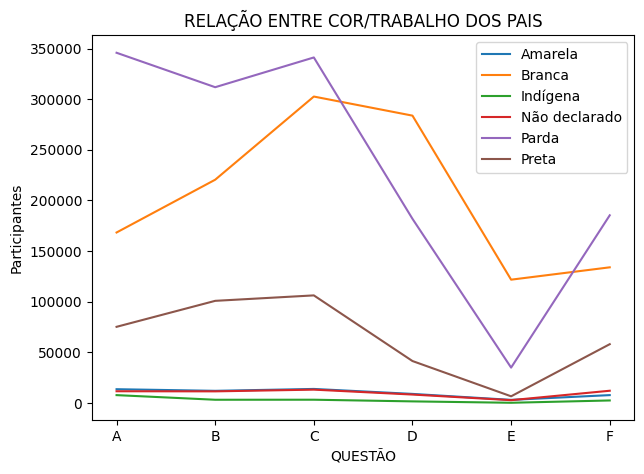

In [101]:
q003Cor = dadosEtnia.filter(items=['Etnia', 'Q003', 'NU_INSCRICAO']).where(dadosEtnia.Q001 != 'F').groupby(['Q003', 'Etnia']).count().unstack()

ax = q003Cor.plot()

legend_labels = q003Cor.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR/TRABALHO DOS PAIS')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

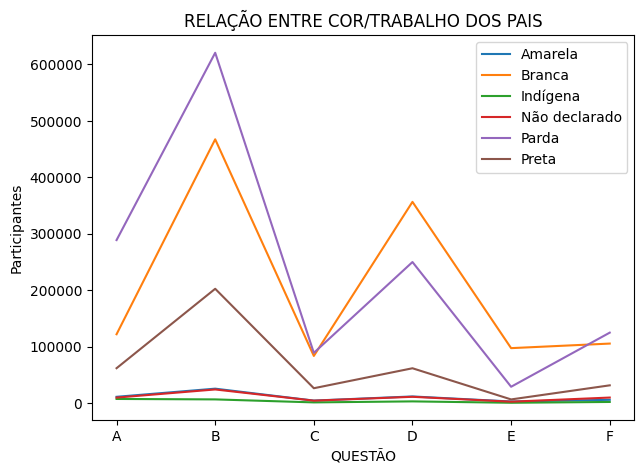

In [102]:
q004Cor = dadosEtnia.filter(items=['Etnia', 'Q004', 'NU_INSCRICAO']).where(dadosEtnia.Q001 != 'F').groupby(['Q004', 'Etnia']).count().unstack()

ax = q004Cor.plot()

legend_labels = q004Cor.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR/TRABALHO DOS PAIS')
plt.ylabel('Participantes')
plt.xlabel('QUESTÃO')
plt.show()

# Pessoas por residência:

In [47]:
dicionarioQ005 = {
    1: 1,
    2: 2,
    3: 3,
    4: 4,
    5: 5,
    6: 6,
    7: 7,
    8: 8,
    9: 9,
    10: 10,
    11: 11,
    12: 12,
    13: 13,
    14: 14,
    15: 15,
    16: 16,
    17: 17,
    18: 18,
    19: 19,
    20: 20
}


In [129]:
dadosEtnia['Q005'] = dadosEnem.Q005

In [132]:
dadosEtnia.filter(items=['NU_INSCRICAO', 'Q005']).groupby(['Q005']).count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
Q005,
4,1150237
3,960346
5,517655
2,464385
6,174502
1,97463
7,63784
8,26543
9,9990


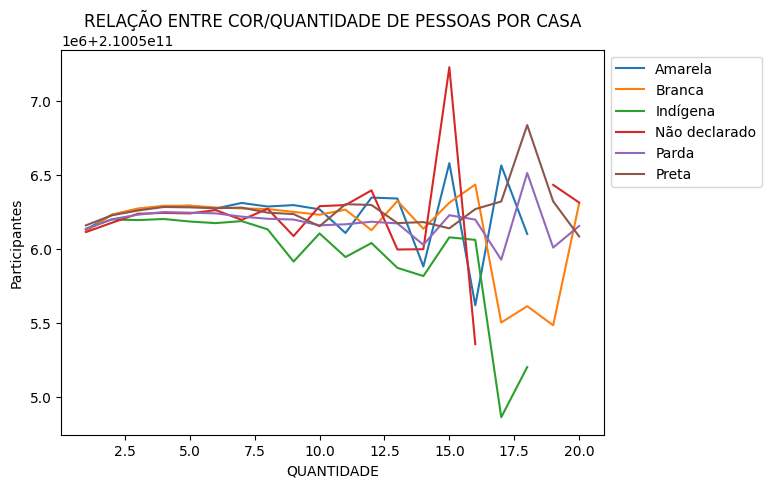

In [153]:
q005Cor = dadosEtnia.filter(items=['NU_INSCRICAO', 'Etnia' , 'Q005']).where(dadosEtnia.Etnia != 'Não Declarado').groupby(['Q005', 'Etnia']).mean().unstack()

ax = q005Cor.plot()

legend_labels = q005Cor.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR/QUANTIDADE DE PESSOAS POR CASA')
plt.ylabel('Participantes')
plt.xlabel('QUANTIDADE')
plt.show()

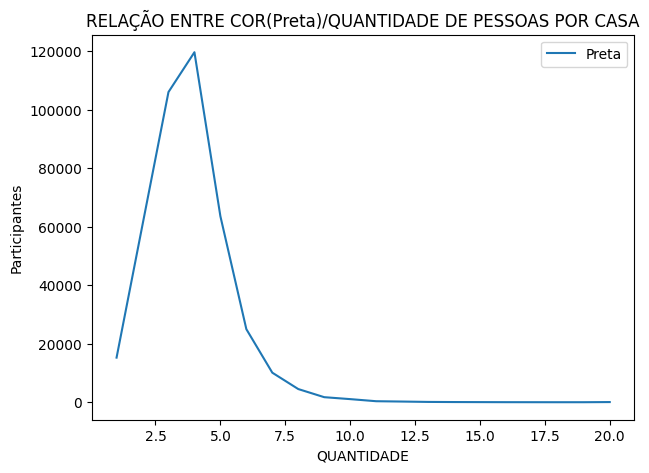

In [143]:
q005Preta = dadosEtnia.filter(items=['NU_INSCRICAO', 'Etnia' , 'Q005']).where(dadosEtnia.Etnia == 'Preta').groupby(['Q005', 'Etnia']).count().unstack()

ax = q005Preta.plot()

legend_labels = q005Preta.columns.get_level_values(1)
ax.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)

plt.rcParams['figure.figsize'] = (7, 5)
plt.title ('RELAÇÃO ENTRE COR(Preta)/QUANTIDADE DE PESSOAS POR CASA')
plt.ylabel('Participantes')
plt.xlabel('QUANTIDADE')
plt.show()

# Renda:

In [48]:
dicionarioQ006 = {
    "A": "Nenhuma Renda",
    "B": "Até R$ 1.212,00",
    "C": "De R$ 1.212,01 até R$ 1.818,00",
    "D": "De R$ 1.818,01 até R$ 2.424,00",
    "E": "De R$ 2.424,01 até R$ 3.030,00",
    "F": "De R$ 3.030,01 até R$ 3.636,00",
    "G": "De R$ 3.636,01 até R$ 4.848,00",
    "H": "De R$ 4.848,01 até R$ 6.060,00",
    "I": "De R$ 6.060,01 até R$ 7.272,00",
    "J": "De R$ 7.272,01 até R$ 8.484,00",
    "K": "De R$ 8.484,01 até R$ 9.696,00",
    "L": "De R$ 9.696,01 até R$ 10.908,00",
    "M": "De R$ 10.908,01 até R$ 12.120,00",
    "N": "De R$ 12.120,01 até R$ 14.544,00",
    "O": "De R$ 14.544,01 até R$ 18.180,00",
    "P": "De R$ 18.180,01 até R$ 24.240,00",
    "Q": "Acima de R$ 24.240,00"
}


In [145]:
dadosEtnia['Q006'] = dadosEnem.Q006

In [146]:
dadosEtnia['R_006'] = [dicionarioQ006[resp] for resp in dadosEtnia.Q006]

In [148]:
dadosEtnia.filter(items=['NU_INSCRICAO', 'R_006']).groupby(['R_006']).count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
R_006,
"Até R$ 1.212,00",1022869
"De R$ 1.212,01 até R$ 1.818,00",584278
"De R$ 1.818,01 até R$ 2.424,00",414266
"De R$ 2.424,01 até R$ 3.030,00",276704
Nenhuma Renda,204475
"De R$ 3.636,01 até R$ 4.848,00",194319
"De R$ 4.848,01 até R$ 6.060,00",188751
"De R$ 3.030,01 até R$ 3.636,00",158091
"De R$ 6.060,01 até R$ 7.272,00",78916


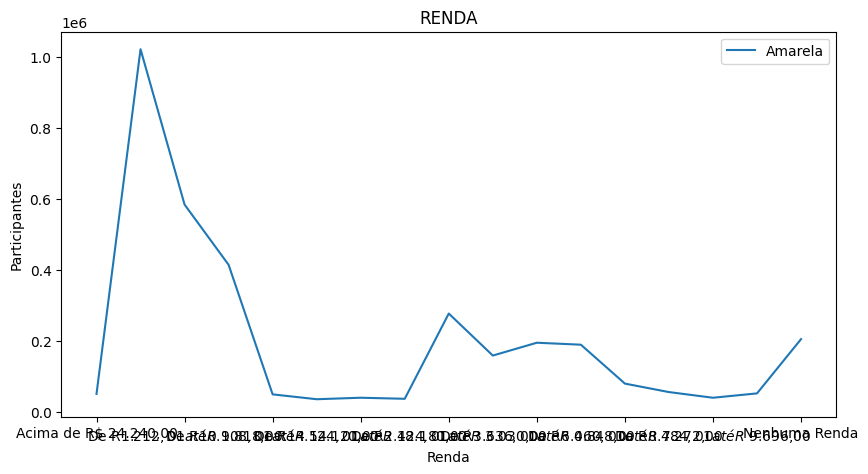

In [158]:
q006 = dadosEtnia.filter(items=['NU_INSCRICAO', 'R_006']).groupby(['R_006']).count()

q006.plot()
plt.legend(legend_labels, bbox_to_anchor=(1.0, 1), loc=0)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title ('RENDA')
plt.ylabel('Participantes')
plt.xlabel('Renda')
plt.show()

# Infraestrutura:

In [49]:
dicionarioQ008_ate_Q021 = {
    "A": "Não",
    "B": "Sim, um",
    "C": "Sim, dois",
    "D": "Sim, três",
    "E": "Sim, quatro ou mais"
}

dicionarioQ023 = {
'A':'Não',
'B':'Sim'
}


# Acesso: Celunar/ Computador/ Internet

In [50]:
dicionarioQ022_Q024 = {
    "A": "Não",
    "B": "Sim, um",
    "C": "Sim, dois",
    "D": "Sim, três",
    "E": "Sim, quatro ou mais"
}

dicionarioQ025 = {
'A':'Não',
'B':'Sim'
}
